In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [3]:
# Load the data
train_data = pd.read_csv('data/train.csv')

In [4]:
# Explore the data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Explore the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Explore the data
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


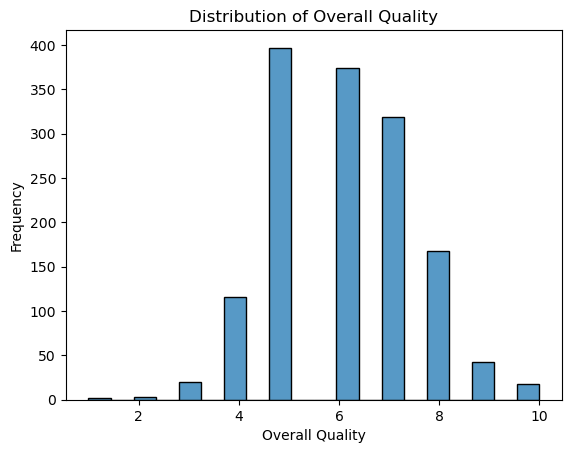

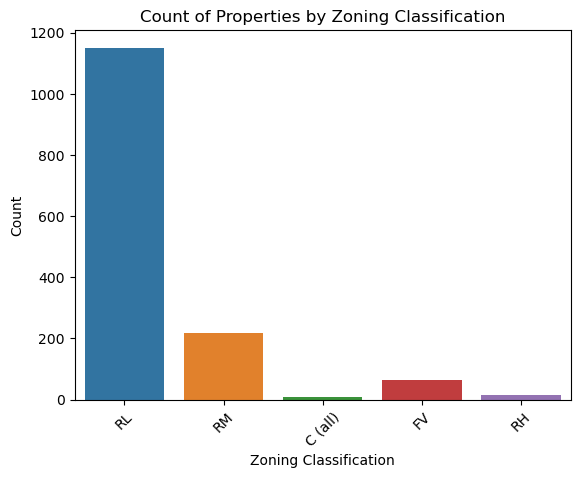

In [7]:
# Histogram for a numerical feature
sns.histplot(data=train_data, x='OverallQual', bins=20)
plt.title('Distribution of Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Frequency')
plt.show()

# Count plot for a categorical feature
sns.countplot(data=train_data, x='MSZoning')
plt.title('Count of Properties by Zoning Classification')
plt.xlabel('Zoning Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


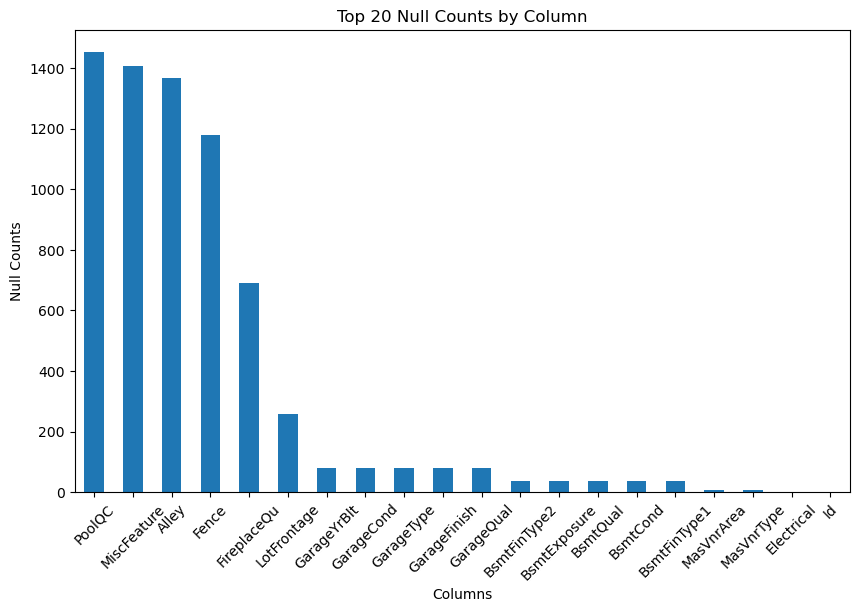

In [10]:
# Display null counts for each column
null_counts = train_data.isnull().sum()

# Sort null counts in descending order
sorted_null_counts = null_counts.sort_values(ascending=False)

# Display top 20 columns with highest null counts
top_20_null_counts = sorted_null_counts.head(20)

# Plot top 20 null counts
plt.figure(figsize=(10, 6))
top_20_null_counts.plot(kind='bar')
plt.title('Top 20 Null Counts by Column')
plt.xlabel('Columns')
plt.ylabel('Null Counts')
plt.xticks(rotation=45)
plt.show()



In [11]:
# Train-Test-Split the data

X = train_data.drop(columns=['SalePrice'])  # Features
y = train_data['SalePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Analyzed different methods to clense data but found imputation to give better results.


# Define SimpleImputer with strategy='most_frequent' for both numerical and categorical columns
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

In [15]:
# Encode cataegorical variable to ensure we do not get error like 'RL' conversion from string to float.

# Convert the imputed training and test arrays back to DataFrames
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Identify categorical columns
categorical_cols = X_train_imputed_df.select_dtypes(include=['object']).columns

# Define transformers for numerical and categorical columns
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ~X_train_imputed_df.columns.isin(categorical_cols)),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train_imputed_df)

# Transform the test data using the trained preprocessor
X_test_preprocessed = preprocessor.transform(X_test_imputed_df)


### Model 1 - Random Forest Model

In [16]:
# Train Random Forest model


# Define the Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the preprocessed training data
rf_model.fit(X_train_preprocessed, y_train)

# Predictions on the training and test sets
y_train_pred = rf_model.predict(X_train_preprocessed)
y_test_pred = rf_model.predict(X_test_preprocessed)

# Calculate Mean Squared Error for training and testing sets
rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_test_mse = mean_squared_error(y_test, y_test_pred)

print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)



Random Forest Train MSE: 180378812.99789545
Random Forest Test MSE: 1431929864.3958442


### Model 2 - Gradient Booster Model

In [17]:
# Define the GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the preprocessed training data
gbm_model.fit(X_train_preprocessed, y_train)

# Predictions on the training and test sets
y_train_pred_gbm = gbm_model.predict(X_train_preprocessed)
y_test_pred_gbm = gbm_model.predict(X_test_preprocessed)

# Calculate Mean Squared Error for training and testing sets
gbm_train_mse = mean_squared_error(y_train, y_train_pred_gbm)
gbm_test_mse = mean_squared_error(y_test, y_test_pred_gbm)

print("Gradient Boosting Machine Train MSE:", gbm_train_mse)
print("Gradient Boosting Machine Test MSE:", gbm_test_mse)


Gradient Boosting Machine Train MSE: 392697021.4133102
Gradient Boosting Machine Test MSE: 1281267135.6520164


### Model 3 - Support Vector Machine (SVM) Model

In [18]:
# Define the SVM model
svm_model = SVR(kernel='linear')

# Train the model on the preprocessed training data
svm_model.fit(X_train_preprocessed, y_train)

# Predictions on the training and test sets
y_train_pred_svm = svm_model.predict(X_train_preprocessed)
y_test_pred_svm = svm_model.predict(X_test_preprocessed)

# Calculate Mean Squared Error for training and testing sets
svm_train_mse = mean_squared_error(y_train, y_train_pred_svm)
svm_test_mse = mean_squared_error(y_test, y_test_pred_svm)

print("Support Vector Machine Train MSE:", svm_train_mse)
print("Support Vector Machine Test MSE:", svm_test_mse)


Support Vector Machine Train MSE: 5946616768.138391
Support Vector Machine Test MSE: 7529036797.960976


### Model 4 - Simple Regression Model

In [31]:


# Define the linear regression model
linear_model = LinearRegression()

# Train the model on the preprocessed training data
linear_model.fit(X_train_preprocessed, y_train)

# Predictions on the training and test sets
y_train_pred_linear = linear_model.predict(X_train_preprocessed)
y_test_pred_linear = linear_model.predict(X_test_preprocessed)

# Calculate Mean Squared Error for training and testing sets
linear_train_mse = mean_squared_error(y_train, y_train_pred_linear)
linear_test_mse = mean_squared_error(y_test, y_test_pred_linear)

print("Simple Linear Regression Train MSE:", linear_train_mse)
print("Simple Linear Regression Test MSE:", linear_test_mse)


Simple Linear Regression Train MSE: 0.0007261295778331403
Simple Linear Regression Test MSE: 1226047954.3458235


### Model 5 Neural Networks (Deep Learning) Model

In [36]:
# Split the data into training and validation sets
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1)  # Output layer with a single neuron for regression task
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Convert sparse tensors to dense NumPy arrays
X_train_nn = X_train_nn.toarray()
X_val_nn = X_val_nn.toarray()
y_train_nn = np.array(y_train_nn)
y_val_nn = np.array(y_val_nn)

# Train the model on the training data with validation data
history = model.fit(X_train_nn, y_train_nn, validation_data=(X_val_nn, y_val_nn), epochs=1000, batch_size=32, verbose=0)

# Make predictions on the training and test sets
y_train_pred_nn = model.predict(X_train_preprocessed)

# Evaluate the model on the training set
train_loss = model.evaluate(X_train_nn, y_train_nn, verbose=0)
train_mse = train_loss ** 0.5  # Calculating RMSE for better interpretability

# Evaluate the model on the validation set
val_loss = model.evaluate(X_val_nn, y_val_nn, verbose=0)
val_mse = val_loss ** 0.5  # Calculating RMSE for better interpretability

print("Neural Network Training RMSE:", train_mse)
print("Neural Network Validation RMSE:", val_mse)




37/37 [==============================] - 0s 1ms/step
Neural Network Training RMSE: 88.2588577796161
Neural Network Validation RMSE: 35571.499602912445
